In [1]:
import pickle
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
# cluster with ward (2 clusters)
from sklearn.cluster import AgglomerativeClustering

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

In [263]:
# get the data from the relevant pickle file
hour = 'Hour15'
infile = open('/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/pickel_files/' + hour,'rb')
pc_pymat = pickle.load(infile)
infile.close()
time_window_hours = 1
time_window_ms = time_window_hours * 60.0 * 60 * 1000

In [264]:
# preform fourie transform using welch  
freq_power = []
t = range(3600)
for i in t:
    single_bin = pc_pymat[i * 20000:20000*(i+1)]
    f, Pxx_den = signal.welch(single_bin, 20000, nperseg=2000, noverlap=1000, scaling='spectrum')
    freq_power.append(Pxx_den)

freq_power = np.array(freq_power)

In [252]:
f[1]

10.0

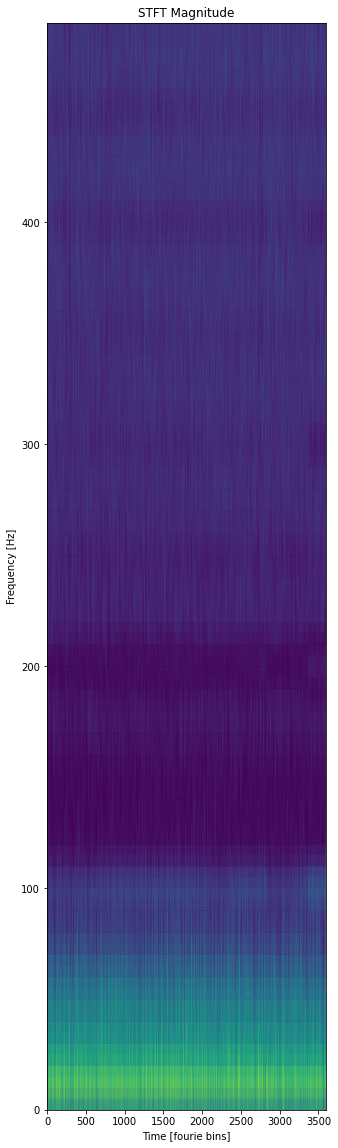

In [270]:
# plot spectogram before processing it
plt.figure(figsize=(5,20))
plt.pcolormesh(t, f[:50], np.abs(np.log(np.transpose(freq_power[:,:50]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()
#H14_H15

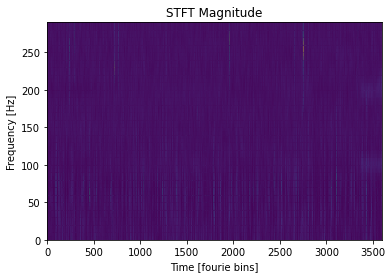

In [254]:
# normalized spectogram data - norm power of each frequency with it's avarage power
low_freq_power = freq_power[:,:30]
avg_freq_power = np.array([0.0]*30)
# calculate avarage power of the freq
for i in range(30):
    avg_freq_power[i] = sum(low_freq_power[:,i]) / low_freq_power.shape[0]
    
# create the normalized matrix
norm_freq_power = []
for seg in low_freq_power:
    new_seg = np.array([0.0]*30)
    for i in range(30):
        new_seg[i] = seg[i] / avg_freq_power[i]
    norm_freq_power.append(new_seg)
    
norm_freq_power = np.array(norm_freq_power)

# segmentation and plot
plt.pcolormesh(t, f[:30], np.abs((np.transpose(norm_freq_power))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

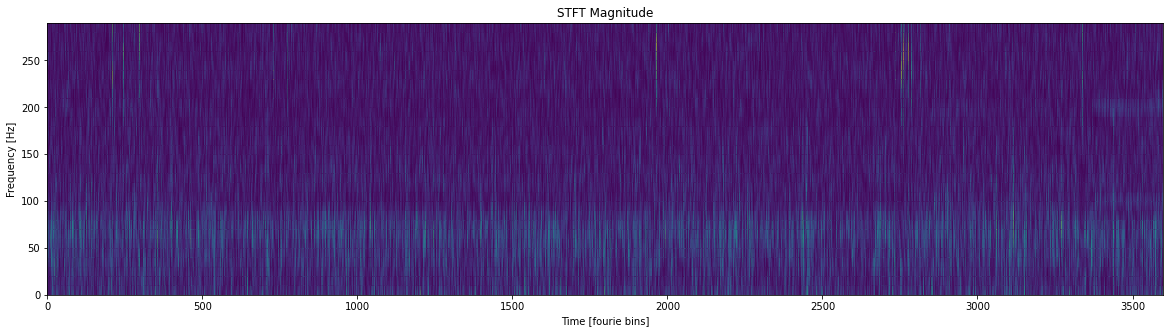

In [255]:
# segmentation and plot
plt.figure(figsize=(20,5))
plt.pcolormesh(t, f[:30], np.abs(np.log(np.transpose(norm_freq_power))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

In [256]:
# freq_power[:,:30]

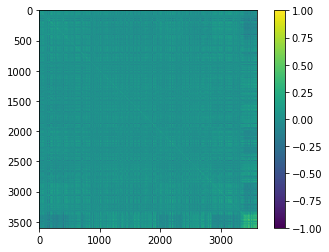

In [257]:
# create the correlation matrix
low_freq_magnitudes = np.abs(norm_freq_power)
# compute correlation matrix of frequencies magnitudes
corr_mat = np.corrcoef(low_freq_magnitudes) #by pearson
corr_mat.shape
plt.imshow(corr_mat)
plt.clim(-1,1)
plt.colorbar()

In [258]:
# re-organize the segments according to clusters
ward_clusters = AgglomerativeClustering().fit(corr_mat)
indices = np.argsort(ward_clusters.labels_)
magnitudes_by_clusters = low_freq_magnitudes[indices]
corr_mat_by_clusters = np.corrcoef(magnitudes_by_clusters)
corr_mat_by_clusters.shape
# plt.imshow(corr_mat_by_clusters)
# plt.clim(-1,1)
# plt.colorbar()

(3600, 3600)

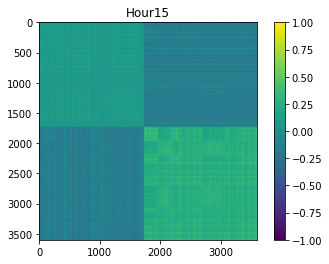

In [259]:
plt.title(hour)
plt.imshow(corr_mat_by_clusters)
plt.clim(-1,1)
plt.colorbar()

In [260]:
# divide the data to two clusters
lables = ward_clusters.labels_
indxes_cls1 = np.where(lables == 0)[0]
indxes_cls2 = np.where(lables == 1)[0]
cls1 = low_freq_magnitudes[indxes_cls1, :]
cls2 = low_freq_magnitudes[indxes_cls2, :]

#cal the freqs
def avrg_freq_per_cluster(cls_group):
    cls_len = cls_group.shape[0]
    relevant_freqs = cls_group.shape[1]
    cls_freqs = [0]*relevant_freqs
    for vec in cls_group:
        for i in range(relevant_freqs):
            cls_freqs[i] += vec[i]

    cls_freqs =  np.divide(cls_freqs,cls_len)
    return cls_freqs

# plot the graph
def show_graph(cls1_freqs, cls2_freqs):
    plt.plot(f[:30],cls1_freqs)
    plt.plot(f[:30],cls2_freqs)
    plt.show()

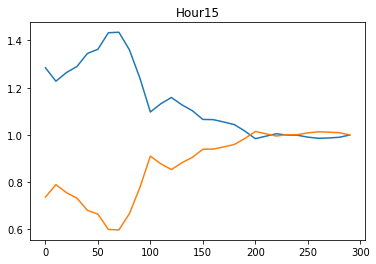

In [261]:
plt.title(hour)
show_graph(avrg_freq_per_cluster(cls1), avrg_freq_per_cluster(cls2))

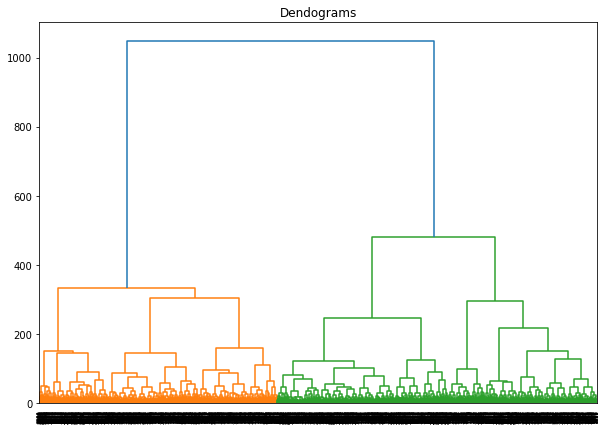

In [59]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(corr_mat, method='ward'))

In [ ]:
cls2)

In [ ]:
plt.figure(figsize=(len(indxes_cls2) / 20,5))
plt.pcolormesh([i for i in range(len(indxes_cls2))], f[:30], np.abs(np.log(np.transpose(freq_power[indxes_cls2,:30]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

In [ ]:
plt.figure(figsize=(len(indxes_cls1) / 20,5))
plt.pcolormesh([i for i in range(len(indxes_cls1))], f[:30], np.abs(np.log(np.transpose(freq_power[indxes_cls1,:30]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()